<a href="https://colab.research.google.com/github/likehs2/Carregamento_Audio_Emocoes/blob/main/CarregamentoAudioEmocoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Importando uma base de dados de pessoas cantando // descompactando // removendo o arquivo zip
!wget https://zenodo.org/record/1188976/files/Audio_Song_Actors_01-24.zip -O Audio_Song_Actors_01-24.zip
!unzip Audio_Song_Actors_01-24.zip -d '/content/Audio_Song_Actors'
!rm Audio_Song_Actors_01-24.zip
#Importando outra base de dados de pessoas conversando // descompactando // removendo o arquivo zip
!wget https://zenodo.org/record/1188976/files/Audio_Speech_Actors_01-24.zip -O Audio_Speech_Actors_01-24.zip
!unzip Audio_Speech_Actors_01-24.zip -d '/content/Audio_Speech_Actors'
!rm Audio_Speech_Actors_01-24.zip

#Identificadores de nome de arquivo
#Cada um dos 7356 arquivos RAVDESS possui um nome de arquivo exclusivo. O nome do arquivo consiste em um identificador numérico de 7 partes (por exemplo, 03-02-01-01-01-01-01.wav). Esses identificadores definem as características do estímulo.

#Modalidade (01 = AV completo, 02 = apenas vídeo, 03 = apenas áudio).
#Canal vocal (01 = fala, 02 = música).
#Emoção (01 = neutro, 02 = calmo, 03 = feliz, 04 = triste, 05 = zangado, 06 = com medo, 07 = nojo, 08 = surpreso).
#Intensidade emocional (01 = normal, 02 = forte). NOTA: Não há intensidade forte para a emoção 'neutra'.
#Frase (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
#Repetição (01 = 1ª repetição, 02 = 2ª repetição).
#Ator (01 a 24. Os atores com números ímpares são homens, os atores com números pares são mulheres).
#Exemplo para o arquivo Audio_Song_Actors/Actor_01/03-02-01-01-01-01-01.wav:

#Modalidade 03: Apenas áudio
#Canal vocal 02: música
#Emoção 01: neutro
#Intensidade emocional 01: normal. NOTA: Não há intensidade forte para a emoção 'neutra'.
#Frase 01: "Kids are talking by the door"
#Repetição 01: 1ª repetição
#Ator 01: 1º ator - homem, já que o número de identificação do ator é impar'''

--2022-10-10 17:59:46--  https://zenodo.org/record/1188976/files/Audio_Song_Actors_01-24.zip
Resolving zenodo.org (zenodo.org)... 188.184.117.155
Connecting to zenodo.org (zenodo.org)|188.184.117.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 225505317 (215M) [application/octet-stream]
Saving to: ‘Audio_Song_Actors_01-24.zip’

Audio_Song_Actors_0 100%[===================>] 215.06M  18.4MB/s    in 13s     

2022-10-10 18:00:00 (16.9 MB/s) - ‘Audio_Song_Actors_01-24.zip’ saved [225505317/225505317]

Archive:  Audio_Song_Actors_01-24.zip
   creating: /content/Audio_Song_Actors/Actor_01/
  inflating: /content/Audio_Song_Actors/Actor_01/03-02-01-01-01-01-01.wav  
  inflating: /content/Audio_Song_Actors/Actor_01/03-02-01-01-01-02-01.wav  
  inflating: /content/Audio_Song_Actors/Actor_01/03-02-01-01-02-01-01.wav  
  inflating: /content/Audio_Song_Actors/Actor_01/03-02-01-01-02-02-01.wav  
  inflating: /content/Audio_Song_Actors/Actor_01/03-02-02-01-01-01-01.wav 

In [4]:
#Criando os DataSets
modalitys = [] # Modalidade (01 = AV completo, 02 = apenas vídeo, 03 = apenas áudio).
voc_channels = [] # Canal vocal (01 = fala, 02 = música).
emotions = [] # Emoção (01 = neutro, 02 = calma, 03 = feliz, 04 = triste, 05 = zangado, 06 = com medo, 07 = nojo, 08 = surpreso).
intensitys = [] # Intensidade emocional (01 = normal, 02 = forte). NOTA: Não há intensidade forte para a emoção 'neutra'.
phrases =[] # Frase (01 = "Crianças conversam perto da porta", 02 = "Cachorros estão sentados na porta").
actors = [] # Ator (01 a 24. Os atores com números ímpares são homens, os atores com números pares são mulheres)

full_path = []

def create_dataset(dataset):
  for root, dirs, files in tqdm(os.walk(dataset)):
    for file in files:
      try:
        modal = int(file[1:2])
        vchan = int(file[4:5])
        label = int(file[7:8])
        ints = int(file[10:11])
        phr = int(file[13:14])
        act = int(file[19:20])

        modalitys.append(modal)
        voc_channels.append(vchan)
        emotions.append(label)
        intensitys.append(ints)
        phrases.append(phr)
        actors.append(act)

        full_path.append((root, file))
      except ValueError:
        continue

In [5]:
#Carregando as pastas de audio para o DataSet
create_dataset('/content/Audio_Speech_Actors')
create_dataset('/content/Audio_Song_Actors')

25it [00:00, 2181.90it/s]
25it [00:00, 2759.85it/s]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


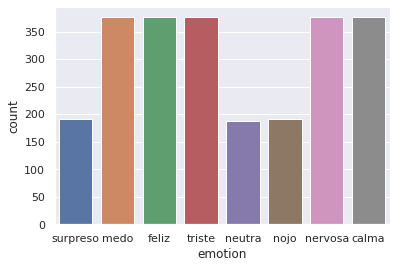

In [6]:
#atribuindo uma descrição para cada emoção
emotions_list = ['neutra', 'calma', 'feliz', 'triste', 'nervosa', 'medo', 'nojo', 'surpreso']
emotion_dict = {em[0] + 1:em[1] for em in enumerate(emotions_list)}
emotion_dict
df = pd.DataFrame([emotions, voc_channels, modalitys, intensitys, actors, phrases, full_path]).T
df.columns = ['emotion', 'voc_channel', 'modality', 'intensity', 'actors', 'phrase', 'path']
df
#Substituindo os valores numericos das tabelas por uma string
df['emotion'] = df['emotion'].map(emotion_dict)
df['voc_channel'] = df['voc_channel'].map({1: 'fala', 2: 'musica'})
df['modality'] = df['modality'].map({1: 'AV completo', 2: 'apenas video', 3: 'apenas audio'})
df['intensity'] = df['intensity'].map({1: 'normal', 2: 'forte'})
df['actors'] = df['actors'].apply({lambda x: 'feminino' if x % 2 == 0 else 'masculino'})
df['phrase'] = df['phrase'].map({1: 'Kids are talking by the door', 2: 'Dogs are sitting by the door'})
df['path'] = df['path'].apply(lambda x: x[0] + '/' + x[1])
df
#Visualizando a distribuição dos dados
df.describe()
#Realizando o contador dessa distribuição
df.emotion.value_counts()
#Gerando o grafico colorido dos resultados
sns.countplot(df['emotion']);
#Salvando os dados em csv
df.to_csv(os.path.join('/content', 'Audio_Actors_metadata.csv'), index = False)


Canais: (205004,)
Número total de amostras: 205004
Arquivo:  /content/Audio_Speech_Actors/Actor_21/03-01-04-02-01-02-21.wav
Taxa de amostragem: 48000
Duração:  4.2709166666666665


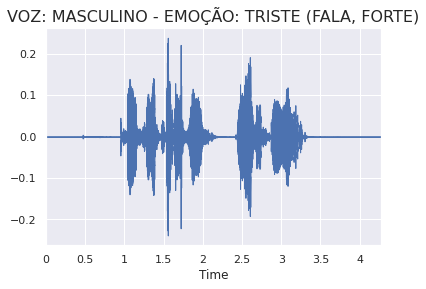

In [14]:
#Seleção de um arquivo de audio aleatorio e criação de um grafico de onda
n_files = df.shape[0]
rnd = np.random.randint(0, n_files)

fname = df.path[rnd] 
data, sample_rate = librosa.load(fname, sr=None)

print('Canais:', data.shape)
print('Número total de amostras:', data.shape[0])
print('Arquivo: ', fname)
print('Taxa de amostragem:', sample_rate)
print('Duração: ', len(data) / sample_rate)

info = df.iloc[rnd].values
title_txt = f'voz: {info[4]} - emoção: {info[0]} ({info[1]}, {info[3]})'
plt.title(title_txt.upper(), size=16)
ld.waveplot(data, sr=sample_rate)
Audio(data = data, rate = sample_rate)

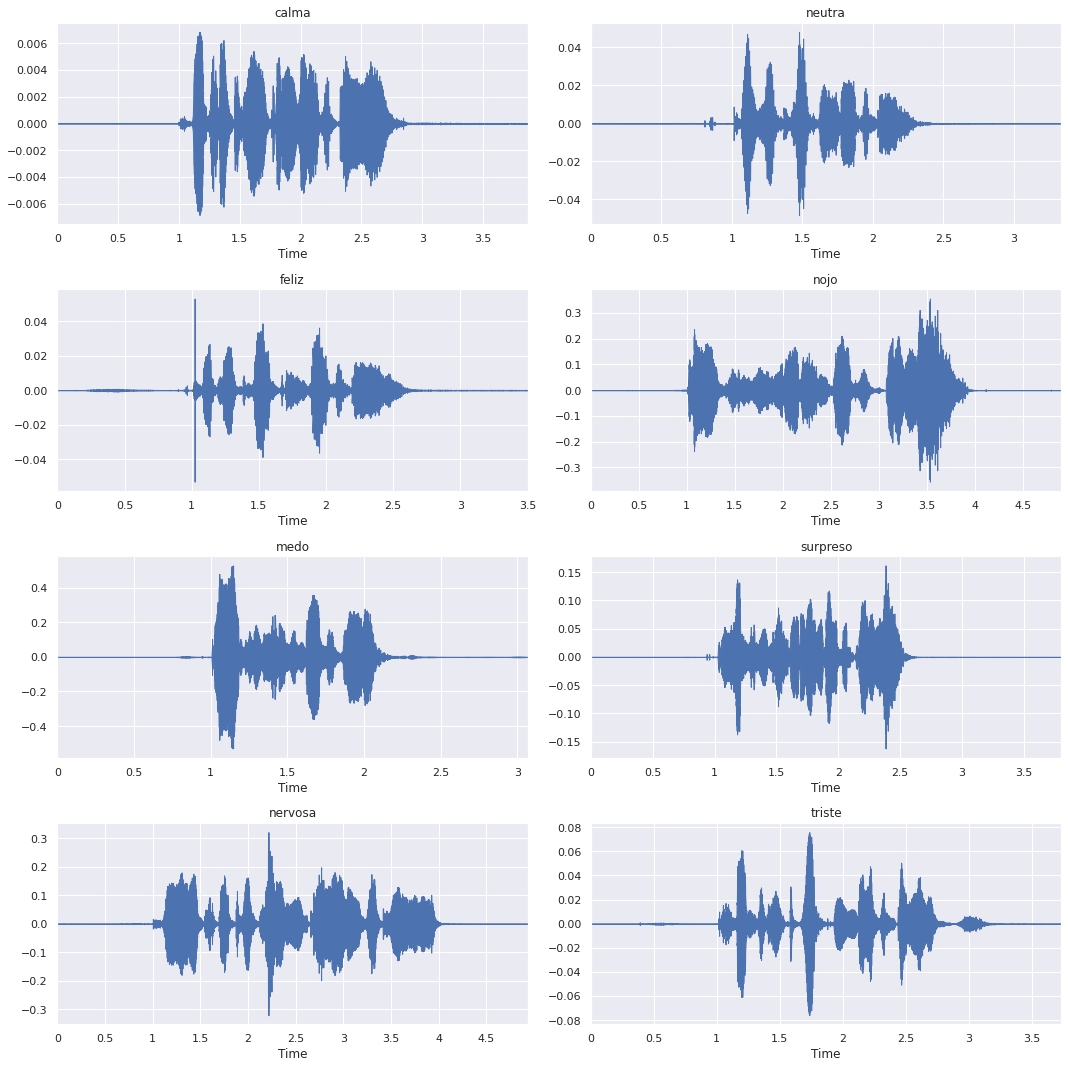

In [11]:
#Verificação dos graficos de onda por tipo de emoção
random_samples = df.groupby('emotion').sample(1)
audio_samples, labels = random_samples['path'].tolist(), random_samples['emotion'].tolist()

rows=4
cols=2
fig, axs = plt.subplots(rows, cols, figsize=(15,15))
index = 0
for col in range(cols):
    for row in range(rows):
        data, sample_rate = librosa.load(audio_samples[index], sr = None)
        librosa.display.waveplot(data, sample_rate, ax=axs[row][col])        
        axs[row][col].set_title('{}'.format(labels[index]))
        index += 1
fig.tight_layout()

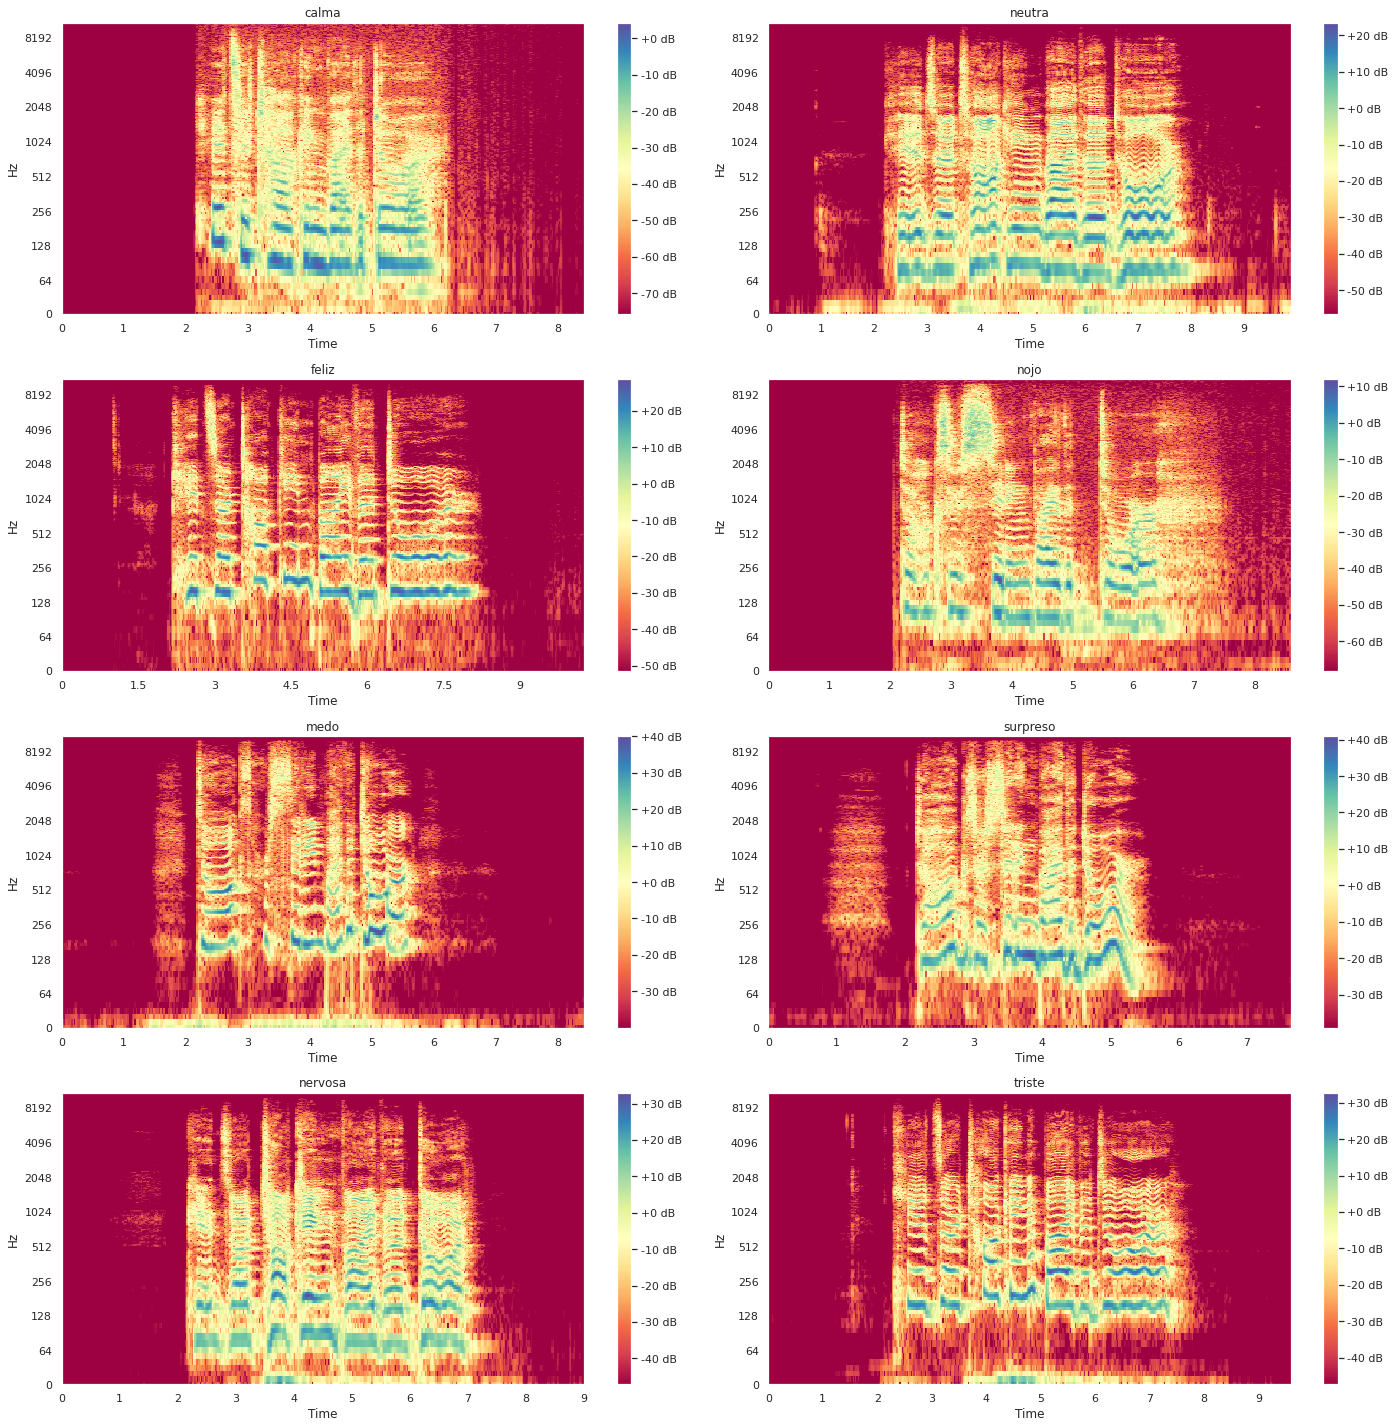

In [9]:
#grafico STFT com a transformada de Furrier
fig, axs = plt.subplots(rows, cols, figsize=(20,20))
index = 0
for col in range(cols):
    for row in range(rows):
        data, sample_rate = librosa.load(audio_samples[index], sr = None)
        stft = librosa.stft(y = data)
        stft_db = librosa.amplitude_to_db(np.abs(stft))
        img = librosa.display.specshow(stft_db, x_axis="time", y_axis='log', ax=axs[row][col], cmap = 'Spectral')
        axs[row][col].set_title('{}'.format(labels[index]))
        fig.colorbar(img, ax=axs[row][col], format='%+2.f dB')
        index += 1
fig.tight_layout()

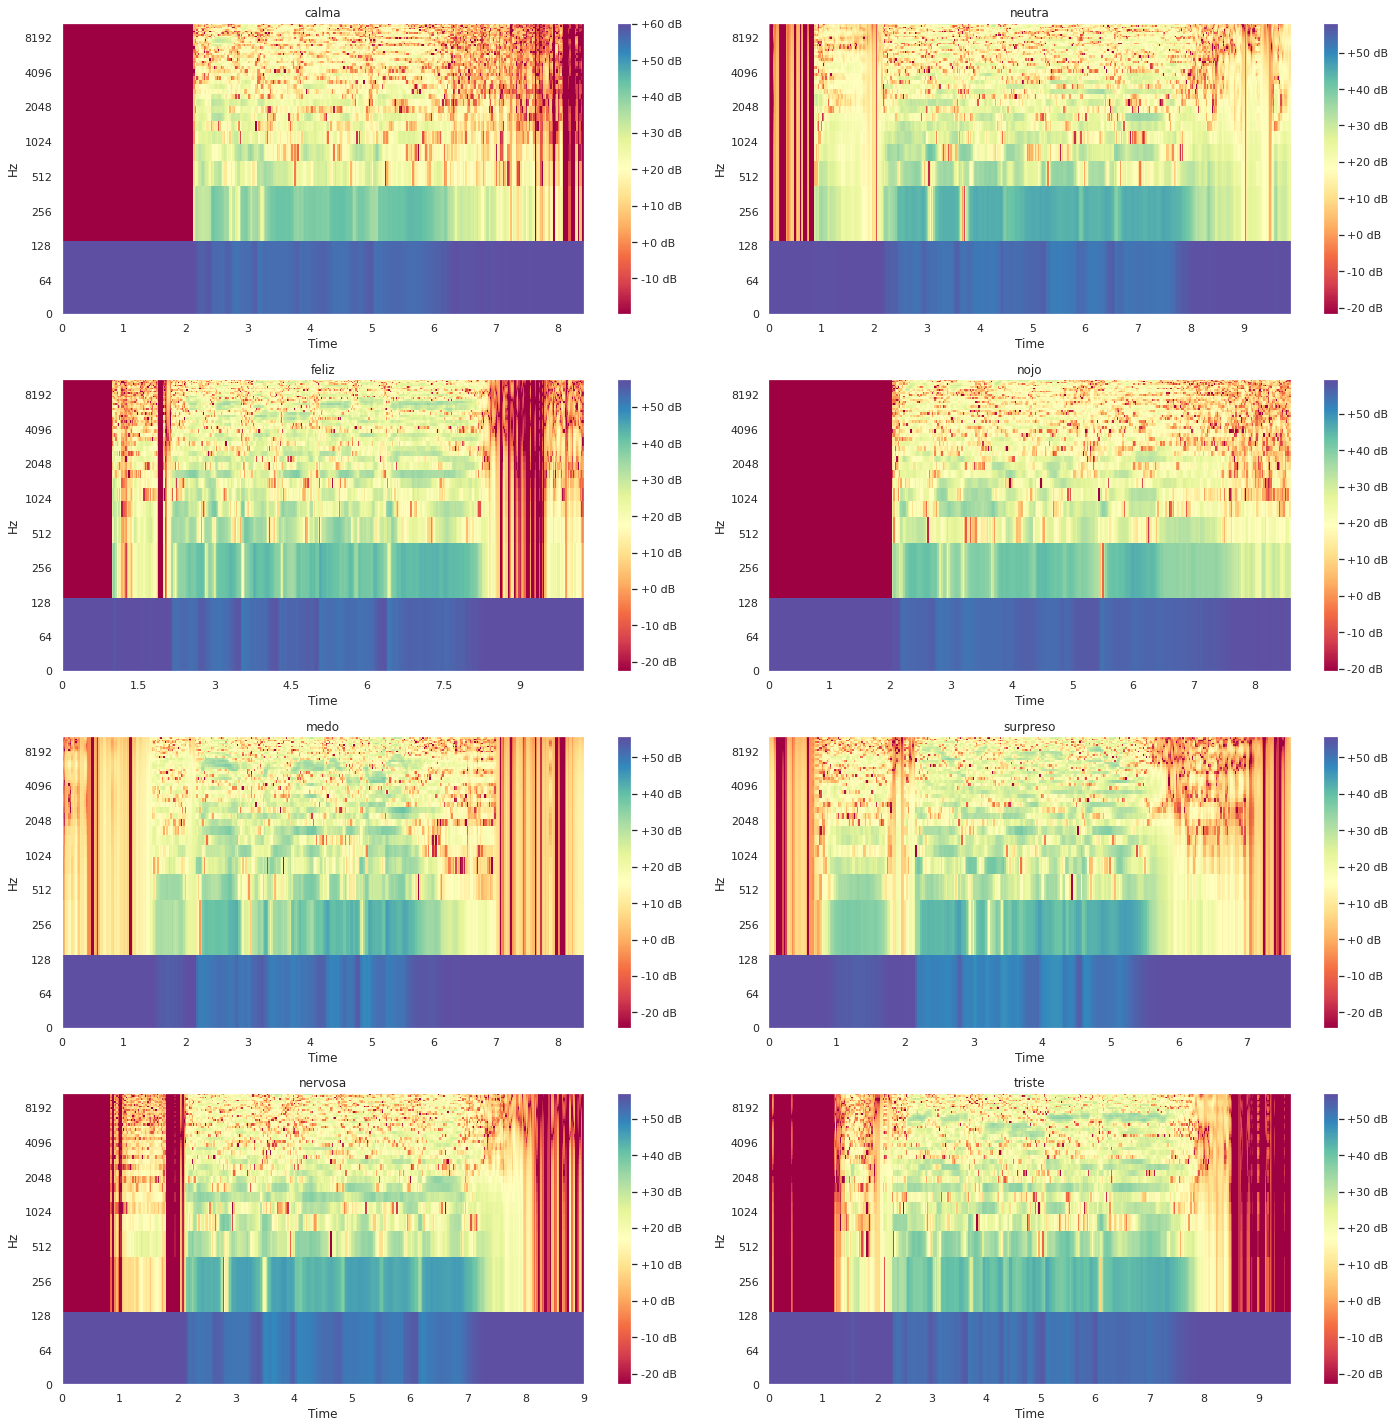

In [10]:
#Espectrogramas de MFCCs utilizados para treinar a rede neural
fig, axs = plt.subplots(rows, cols, figsize=(20,20))
index = 0
for col in range(cols):
    for row in range(rows):
        data, sample_rate = librosa.load(audio_samples[index], sr = None)
        mfccs = librosa.feature.mfcc(y = data, sr=sample_rate, n_mfcc=40)
        mfccs_db = librosa.amplitude_to_db(np.abs(mfccs))
        img = librosa.display.specshow(mfccs_db, x_axis="time", y_axis='log', ax=axs[row][col], cmap = 'Spectral')
        axs[row][col].set_title('{}'.format(labels[index]))
        fig.colorbar(img, ax=axs[row][col], format='%+2.f dB')
        index += 1

fig.tight_layout()

In [2]:
import os
import pathlib
from datetime import datetime
import librosa
import librosa.display as ld
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import Audio
from tqdm import tqdm
import tensorflow as tf
print(f'[INFO] tensorflow: {tf.__version__}')
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import (Activation, Conv1D, Dense, Dropout, Flatten, MaxPooling1D)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

[INFO] tensorflow: 2.8.2
